## About Dataset
In our research, we gathered a dataset of 1503 records from a medical hospital using a
questionnaire administered through a Google form. This dataset has not yet been published.
Our dataset includes 15 attributes, where I select 10 attributes, 9 of which were used for
analysis and 1 of which was the target attribute. The target attribute, "Feeling Anxious,"
was chosen as a predictor of postpartum depression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('post natal data.csv')

## Explore the Data

In [3]:
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

In [5]:
df.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [6]:
df.describe(include='all')

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,90,5,3,3,3,3,3,2,3,3,3
top,6/15/2022 22:24,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,51,364,536,555,640,583,841,980,624,557,709


## Clean the Data

In [7]:
#drop timestam
new_df = df.iloc[:,1:]

In [8]:
new_df.fillna('Not_given',inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6900\1540020050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.fillna('Not_given',inplace=True)


In [9]:
new_df.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [10]:
#rename some columns

new_df['Trouble sleeping at night'].replace('Two or more days a week','Yes',inplace=True)
new_df['Overeating or loss of appetite'].replace('Not at all','No',inplace=True)
new_df['Problems of bonding with baby'].replace('Sometimes','Yes',inplace=True)
new_df['Feeling sad or Tearful'].replace('Sometimes','Yes',inplace=True)
new_df['Irritable towards baby & partner'].replace('Sometimes','Yes',inplace=True)
new_df['Problems concentrating or making decision'].replace('Often','Yes',inplace=True)
new_df['Suicide attempt'].replace('Not interested to say','Not given',inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6900\1622507889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Trouble sleeping at night'].replace('Two or more days a week','Yes',inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_6900\1622507889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Overeating or loss of appetite'].replace('Not at all','No',inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_6900\1622507889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

## Analyse our Data

### 1. Symptom profile of postpartum depression: 

By analyzing the various symptoms reported by the respondents, a profile of postpartum depression can be created. For example, it may be found that feeling sad or tearful is the most common symptom, followed by problems with sleeping at night and irritability towards the baby and partner.

In [11]:
copy = new_df.copy()  #Create a copy of the dataset

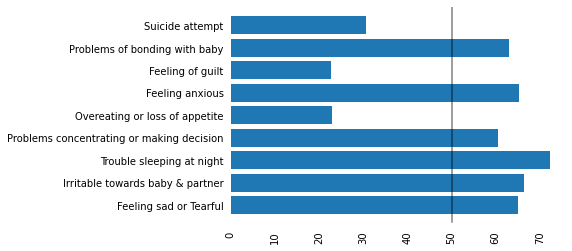

In [12]:
# create a new dataframe with just 'yes' values
copy = copy.iloc[:,1:]
yes_df = copy[copy == 'Yes'].count().to_frame().reset_index()
yes_df.columns = ['Symptoms', 'Count']
yes_df['Yes_rate (%)'] = (yes_df['Count']/1503) * 100

# create a bar chart
fig,ax = plt.subplots()
ax.barh(yes_df['Symptoms'], yes_df['Yes_rate (%)'])
#plt.title("Symptoms for Post Partum Depression")
plt.xticks(rotation=90)

for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)

ax.tick_params(bottom=False,left=False)

# Insert vertical line at the 50 x label
ax.axvline(x=50, ymin=0.01,ymax=1.0,c='black',alpha=0.5);

we can pick the prevailing symptoms of post partum depressions with factors with atleast 50% 'Yes' answers from the mothers. As we can see, the prevailing symptoms of post patum depression in women are:

- Problem with bonding with baby
- feeling anxious
- Problems concentrating or making decision
- Trouble sleeping at night'
- Irritable towards baby and partner
- Feeling sad or Tearful

### 2: Risk factors for postpartum depression: 

The dataset can also be used to identify risk factors for postpartum depression. For example, the age of the mother may be associated with a higher risk of depression, as may problems with bonding with the baby.


In [15]:
felt_anxious = new_df.groupby('Age')['Feeling anxious'].count().reset_index()
fig = px.pie(felt_anxious, values='Feeling anxious', names="Age")
fig.show()

From our Analysis, we can see that the mother's age can be a risk factor. we can see that younger mothers (25-30) experience less anxiety as compared to older mothers.